# Measuring Variation in the Empirical Storm Season Over Time

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Measuring-Variation-in-the-Empirical-Storm-Season-Over-Time" data-toc-modified-id="Measuring-Variation-in-the-Empirical-Storm-Season-Over-Time-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Measuring Variation in the Empirical Storm Season Over Time</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Related-Research" data-toc-modified-id="Related-Research-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Related Research</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Has-the-variation-in-the-empirical-storm-season-changed-over-time?" data-toc-modified-id="Has-the-variation-in-the-empirical-storm-season-changed-over-time?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Has the variation in the empirical storm season changed over time?</a></span><ul class="toc-item"><li><span><a href="#State-Space-Model" data-toc-modified-id="State-Space-Model-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>State Space Model</a></span></li></ul></li><li><span><a href="#Annual-percentage-of-storms-outside-official-storm-season-changing?" data-toc-modified-id="Annual-percentage-of-storms-outside-official-storm-season-changing?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Annual percentage of storms outside official storm season changing?</a></span></li><li><span><a href="#Is-the-Distribution-of-the-Empirical-Storm-Season-Stationary?" data-toc-modified-id="Is-the-Distribution-of-the-Empirical-Storm-Season-Stationary?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Is the Distribution of the Empirical Storm Season Stationary?</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Acknowledgments" data-toc-modified-id="Acknowledgments-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Acknowledgments</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Supplemental-Analyses" data-toc-modified-id="Supplemental-Analyses-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Supplemental Analyses</a></span><ul class="toc-item"><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Autocorrelation</a></span></li><li><span><a href="#Priors" data-toc-modified-id="Priors-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Priors</a></span></li><li><span><a href="#Atlantic-Ocean" data-toc-modified-id="Atlantic-Ocean-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Atlantic Ocean</a></span></li><li><span><a href="#Pacific-Ocean" data-toc-modified-id="Pacific-Ocean-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Pacific Ocean</a></span></li></ul></li><li><span><a href="#Licenses" data-toc-modified-id="Licenses-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Licenses</a></span></li></ul></div>

# Introduction

This blog post attempts an analysis of the annual variability of dates on which storms form.  Throughout, the word storm will refer generally to named hurricanes or tropical cyclones in either the Atlantic or the Pacific oceans.  The inspiration of this analysis came from a [CSU, Chico](http://www.csuchico.edu/) campus seminar.

During the Fall semester of 2017, CSU, Chico's [Dr. Ann Bykerk-Kauffman](http://www.csuchico.edu/%7eabykerk-kauffman/) gave one of three talks at the [Department of Geological and Environmental Sciences](http://www.csuchico.edu/geos/index.shtml) seminar titled [2017 Hurricane Talk](http://www.csuchico.edu/geos/stories/17.09.14_HurricaneTalk.shtml).  Part of Dr. Bykerk-Kauffman's presentation included data from the National Oceanic and Atmospheric Administration's National Hurricane Center's (NHC) Data Archive: https://www.nhc.noaa.gov/data/#hurdat [Landsea:2013].  After her talk, Dr. David M. Hassenzahl, Dean of the [College of Natural Sciences](https://www.csuchico.edu/nsci/index.shtml), asked a great question, which I'll try to paraphrase:  Is the variation of the empirical storm season changing over time?

One possible way to interpret the phrase *variation of the empirical storm season* goes like this.  The [official storm season](https://en.wikipedia.org/wiki/Atlantic_hurricane_season) is June 01 to November 30.  The official storms season proves useful as a contrast to an empirical storm season.  The word empirical refers to the actual dates for which the named storms in any given year form.  Just because we define a storm season, does not mean all the storms form within the official storm season.  Some years contain some storms outside the official storm season, and some years contain all storms witihin the official storm season -- as we'll see later, no year in our data set has all storms outside of the official storm season.  Since there is not a direct correspondence between the official storm season and the empirical storm season, it's useful to separate these two phrases.  Last, the word variation describes the average distance (measured in days) from the middle of the empirical storm season.

There are of course other ways to measure the variation of the empirical storm season.  This blog post attempts to quantify the annual variation of the empirical storm season in three different ways.  The first attempt follows the logic in the last paragraph.  The second attempt defines a percentage of storms that form outside of the official storm season, relative to the total number of storms in each year.  The last attempt hypothesizes a probability distribution that produces storms throughout the year, and then asks if this distribution of storms changes over time.

The rest of this post proceeds as follows.  Section 2 discusses some related research and briefly compares the analysis here to previous efforts.  Section 3 walks through the data preparation necessary for our analyses.  Section 4 contains the bulk of the analysis, for which multiple measurements of variation of the storm season are considered as a time series.  In a seemingly uncommon move, we've lumped together data from both the Atlantic and the Pacific oceans for the years 1851 to 2016.  There is no qualitative, and only minor quantitative, differences found by breaking up the data by time, space, or both, and Section 9 provides the evidence of this.  The post is concluded in Section 6, and Sections 7 and 8 offer my appreciation to those who directly and indirectly made this analysis possible.

# Related Research

Much research effort is spent on storms of both the Atlantic and Pacfic oceans.  For instance, just a quick glance of [NOAA's media releases](http://www.noaa.gov/media-releases) shows that much of their latest research revolves around the storm season.  With a little more attention to their articles, it's clear that much of this work focuses on storm intensity and/or number of storms.  Less research is devoted to the variation in the storm season.

In 2008, Kossin tried to answer "Is the North Atlantic hurricane season getting longer?" [Kossin:2008].  He concluded that it was.  He used quantile regression on the dates for which storm events first started -- as we will do here.  This strategy was recommended over calculating the range (latest minus earliest dates of storm events) within each year, because the range, in some sense, throws aways many data points inbetween these extremes.  Kossin's quick discussion on this topic, though, misses the fact that storm seasons are likely related through time.  There is indeed some correlation across time (autocorrelation) in the storm season.  We attempt to analysize the variation of the empirical storm season while taking this autocorrelation into account.

XXX what of https://www.livescience.com/2686-hurricane-season-longer.html

Or https://www.wunderground.com/blog/JeffMasters/is-the-atlantic-hurricane-season-getting-longer.html

especially given [Karloski:2016]'s seemingly pessimistic (more realistic) summary of Kossin's work.



About a decade later, evidence of such correlations in the storm seasons across time surfaced in the article "Variation of the Tropical Cyclone Season Start in the Western North Pacific" [Kim:2017].  Specifically, the authors found that a strong El Niño year will delay the start of the storm season in the following year.  This analysis, too, treated the annual measurements of the storm season as independent across time.  Further, this article showed, with a statistic similar to the interquartile range (using percentiles 95% and 5%, instead of 75% and 25%) there appeared a statistically insignificant shrink in the storm season. 

The following analysis attempts to measure the variation in the storm season, while recognizing that there exists autocorrelation in the storm season.  Like the previous authors, we will use the dates within the year that named storms first formed.  While an attempt is made to incorporate the previous authors' ideas of variation, we also expand on the idea of variation by introducing novel measures of variation of the storm season.

# Data Preparation

We begin by setting up the working environment: loading [Python](https://www.python.org) and various packages common to Python's data science community, including [Stan](http://mc-stan.org) the probabilistic programming language which we'll use to fit a Bayesian structural time series model.

The HURDAT2 data used here was processed from the NHC data archive to enable this analysis.  The source code and data are available on [GitHub](https://github.com/roualdes/stormevents).

In [64]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rc
import bplot as bp
import datetime
import pystan
import stan_utility
import requests
%matplotlib inline
rc('text', usetex=True)

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/roualdes/stormevents/master/data.csv')

To properly work with dates in Python, we convert dates, from the format YYYMMDD, into formal datetime objects.  We assign numbers to dates by counting days since 0001-01-01 UTC plus 1; see [matplotlib dates](https://matplotlib.org/api/dates_api.html) for technical details.   

In [66]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.drop_duplicates('name', inplace=True) # don't double count storms
df['year'] = df.date.dt.year 
df['month'] = df.date.dt.month
df['cnum_dates'] = mdates.date2num([datetime.datetime(2018, d.month, d.day)                     
                         for _, d in df['date'].dropna().iteritems()]) 
df['num_dates'] = mdates.date2num([datetime.datetime(d.year, d.month, d.day)                     
                         for _, d in df['date'].iteritems()])
df.head()

,date,time,record_identifier,intensity_rating,name,year,month,cnum_dates,num_dates
0,1851-06-25,0.0,NaN,HU,AL011851,1851,6,736870.0,675874.0
14,1851-07-05,1200.0,NaN,HU,AL021851,1851,7,736880.0,675884.0
15,1851-07-10,1200.0,NaN,TS,AL031851,1851,7,736885.0,675889.0
16,1851-08-16,0.0,NaN,TS,AL041851,1851,8,736922.0,675926.0
65,1851-09-13,0.0,NaN,TS,AL051851,1851,9,736950.0,675954.0


With dates properly set up, we can easily visualize the total number of storms each year.  The plot below shows that the number of storms occuring each year is increasing in time.

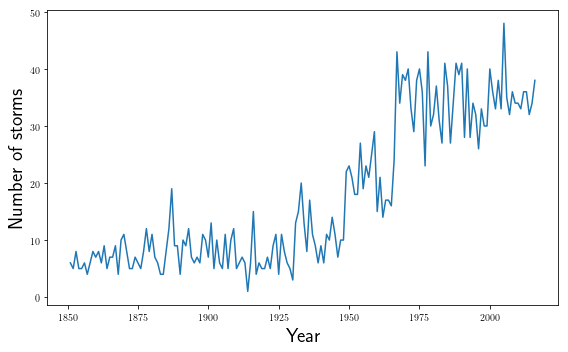

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()
bp.curve(df['year'].unique(), 
         df['date'].dt.year.value_counts().sort_index())
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of storms', fontsize=20)
plt.tight_layout()

Or we can sum, within each month, the number storms that hit either the Pacific or Atlantic oceans.  September appears to be the most common month for a storm.

In [68]:
df['date'].dt.month.value_counts().sort_index()

1       5
2       1
3       2
4       5
5      77
6     253
7     406
8     697
9     841
10    485
11    114
12     16
Name: date, dtype: int64

Similar information is displayed with a histogram.  The histogram is nice because we can see how well the official storm season captures the highest density of storms.  Like above, the plot below is aggregated over all the years for which we have data.
<a id='average_density'></a>

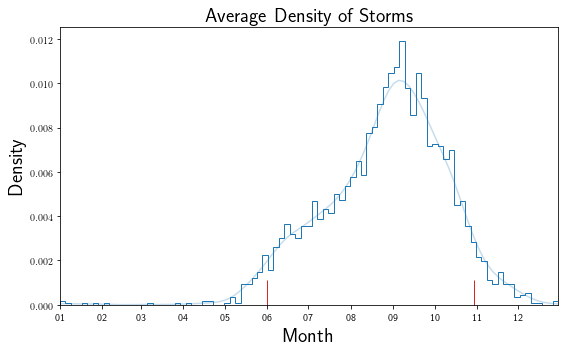

In [69]:
storm_season = mdates.date2num([datetime.datetime(2018, 6, 1), 
                                datetime.datetime(2018, 10, 30)])

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()      
bp.histogram(df['cnum_dates'], bins=365//4)
bp.density(df['cnum_dates'], alpha=0.25) 
bp.rug(storm_season, markersize=50, color='tab:red')
plt.xlabel('Month', fontsize=20)
plt.ylabel('Density', fontsize=20)      
plt.title('Average Density of Storms', fontsize=20)
ax.set_xlim([df['cnum_dates'].min(), df['cnum_dates'].max()])  
ax.xaxis.set_major_locator(mdates.AutoDateLocator())                                 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))                          
plt.tight_layout()

Averaged across all years, there is less than 10% of storms that fall outside of the official storm season.  Below is the calculation of the percentage of storms within the official storm season. Of course, this calculation ignores the year to year variation in this percentage.  

In [70]:
np.sum((df['cnum_dates'] > storm_season[0]) & (df['cnum_dates'] < storm_season[1])) / df.shape[0] * 100

91.592005513439

# Analysis

## Has the variation in the empirical storm season changed over time?

In an effort to answer Dean Hassenzahl's question, we attempt to measure the variation of the empirical storm season year over year.  To measure such variation, we will use the [median absolute deviation](https://en.wikipedia.org/wiki/Median_absolute_deviation) (MAD) statistic.  The MAD statistic is an estimator of the population standard deviation σ, which is based on the median instead of the mean making it more robust to potential outliers.  

To measure the variation of the emprical storm season over time, first consider a year $Y$.  In year $Y$, there will be a handful of storms that occur at different times.  Recall, we converted dates to numbers as per the discussion above in Section Data Preparation.  Define the median storm date as the date corresponding to the median of the numbers that represent the storms' dates.

In [71]:
df['median'] = df.groupby('year')['num_dates'].transform(lambda x: x.median())
df['median_date'] = mdates.num2date(df['median'])

The plot below depicts this visually for the year 2005.  The histogram of storms in 2005 appears in blue, as do the vertical ticks representing each storm.  The median storm date appears as the taller, red tick.
<a id='2005_density'></a>

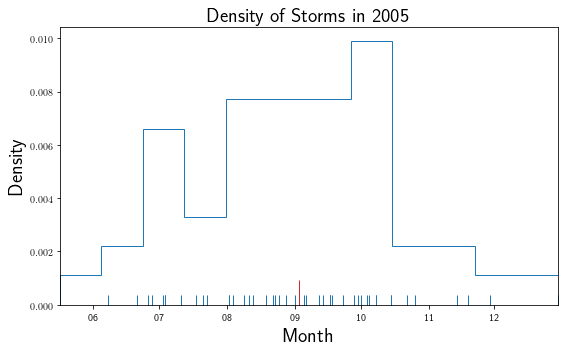

In [72]:
idx_2005 = df['year'] == 2005
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()
bp.histogram(df['num_dates'].loc[idx_2005], bins=365//30)
bp.rug(df['num_dates'].loc[idx_2005].values, markersize=20)
bp.rug(df['median'].loc[idx_2005].values[:1], markersize=50, color='tab:red')
plt.xlabel('Month', fontsize=20)
plt.ylabel('Density', fontsize=20)      
plt.title('Density of Storms in 2005', fontsize=20)
ax.set_xlim([df['num_dates'].loc[idx_2005].min(), 
             df['num_dates'].loc[idx_2005].max()])  
ax.xaxis.set_major_locator(mdates.AutoDateLocator())                                 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m')) 
plt.tight_layout()

By this definition, across all the years, the median storm dates generaly fall in August or September.  The following table depicts the counts of the median storm date within each numbered month, over all the years for which we have data.

In [73]:
df.drop_duplicates('year', inplace=False)['median_date'].dt.month.value_counts().sort_index()

7      1
8     72
9     90
10     3
Name: median_date, dtype: int64

The median storm date strictly measures an average storm date within year $Y$. Variation on the other hand measures average distance from the median storm date.  We measure distance from the median storm date in days.  Since some storms form before the median storm date and some storms after, we take the absolute value of the distance of each storm from the median storm date. Our MAD estimator is the median of the absolute values of these distances.  The last step scales our MAD estimator by $\frac{1}{\Phi^{-1}(0.75)} \approx 1.4826$, in a fairly standard assumption of normal data.  In the end, we have MAD estimates of the variation of the empirical storm season for each year in our data set.

To help visualize this calculation, consider the plot above.  For each storm (blue ticks), count the days between each storm and the median storm date (red tick), disregarding any potential negative signs.  From these counts, calculate the median and then scale it by $1.4826$.  This calcuation is done for each year, and we refer to the collection of yearly statistics as the MAD estimates.

In [74]:
df['mad'] = df.apply(lambda x: np.abs((x['num_dates'] - x['median'])), axis=1)
sdf = (df[['year', 'mad']].groupby('year', as_index=False)
            .aggregate(lambda x: 1.4826*np.median(x)))

A plot of the MAD estimates across time appears to show a subtle, positive slope.  A non-zero slope would indicate a change in the variation of the empirical storm season across time.  Hence, to answer Dean Hassenzahl's question, we seek to quantify statistically the slope of the following data.

A standard first attempt would fit simple linear regression to these data.  However, fitting linear regression to these data ignores all possible correlation in storm seasons across time.  In this scenario, each year is treated as independent.  Recall, both Kossin and Kim treated their data as independent across time.  

Treating each year as independent is suspicious and can lead to over confident conclusions.  In an attempt at educational, we next demonstrate using simple linear regression what could go wrong by assuming independence across time.

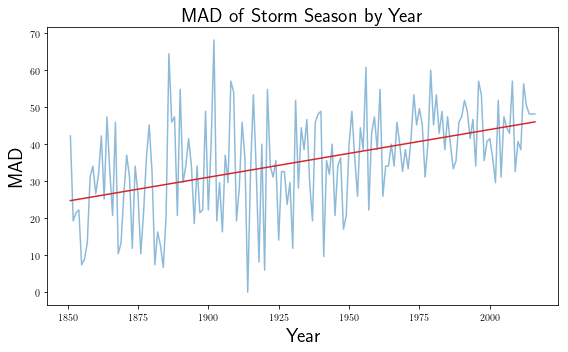

In [75]:
reg = sm.OLS(sdf['mad'], sm.tools.add_constant(sdf['year'])).fit()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()
bp.curve(sdf['year'], sdf['mad'], alpha=0.5)
bp.line(sdf['year'], reg.fittedvalues, color='tab:red')
plt.xlabel('Year', fontsize=20)
plt.ylabel('MAD', fontsize=20)
plt.title('MAD of Storm Season by Year', fontsize=20)
plt.tight_layout()

The plot above looks reasonable and the slope point estimate is reasonable.  However, the standard error is wrong.  Because of the incorrect standard error, the regression output below suggests that there is a statistically significant slope across time (`year` p-value < 0.0001).  Despite the small p-value on the coefficient `year`, I'm hesitant to admit that the storm season this year is not related to the storm season of next year in any way.  Subsection Autocorrelation provides evidence of correlation across time with a plot of the autocorrelation of the MAD estimates.

In [76]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mad   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     42.97
Date:                Mon, 02 Jul 2018   Prob (F-statistic):           6.88e-10
Time:                        11:53:08   Log-Likelihood:                -649.14
No. Observations:                 166   AIC:                             1302.
Df Residuals:                     164   BIC:                             1309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -214.1017     38.073     -5.623      0.000    -289.279    -138.925
year           0.1290      0.020      6.555      0.000       0.090       0.168
==============================================================================
Omnibus:                        1.067   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.699
Skew:                           0.105   Prob(JB):                        0.705
Kurtosis:                       3.239   Cond. No.                     7.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I present the regression output as a reminder that p-values are meaningless when an incorrect model is specified.  I also happen to believe that all models are incorrect, but this is not that place to discuss this matter.  We next improve upon this simplistic model.

### State Space Model

To better model these data, such that we do not strictly rule out a correlation of the storm seasons across time, we fit a Bayesian structural time series model using [Stan](http://mc-stan.org/).  Our model is comparable to the local linear trend model, sometimes called the semilocal linear trend model

$$
\begin{align}
y_t & = \mu_t + \epsilon_t \\
\mu_{t+1} & = \mu_t + \nu_t + \gamma_t \\
\nu_{t+1} & = \eta + \phi(\nu_t - \eta) + \zeta_t \\ 
\epsilon_t & \sim \mathbb{N}(0, \sigma_y^2) \\
\gamma_t & \sim \mathbb{t}_3(0, \sigma_{\mu}^2) \\
\zeta_t & \sim \mathbb{t}_3(0, \sigma_{\nu}^2) \\
\end{align}
$$

where $y_t$ is the time series of interest and $\epsilon_t, \gamma_t$, and $\zeta_t$ are independent.  We use $\mathbb{N}(0, \sigma^2)$ to stand for a normal random variable with mean $0$ and variance $\sigma^2$, and $\mathbb{t}_{df}(0, \sigma^2)$ for a t-distribution with degrees of freedom $df$, mean $0$, and variance $\sigma^2$.  

The variable $\eta$ is of most interest as it is a long run slope in the time series; the slope back towards which the deviations $\nu_{t}$ will drift.  For more details on this model, consult [Time Series Analysis by State Space Methods](https://www.amazon.com/Time-Analysis-State-Space-Methods/dp/019964117X/ref=pd_lpo_sbs_14_t_0?_encoding=UTF8&psc=1&refRID=BXZQ1XM11ZFFZDP4QVSP) and the [R](https://cran.r-project.org/)  package [bsts](https://cran.r-project.org/web/packages/bsts/index.html)'s help page on their semilocal linear trend model or their blog post about the [semilocal linear trend model](http://www.unofficialgoogledatascience.com/2017/07/fitting-bayesian-structural-time-series.html).

Here, the time series of interest $y_t$ is the yearly MAD estimates of variation of the empirical storm season. Since this model will better handle possible correlations across time in the MAD estimates of variation, we will have an appropriate estimate of the variation in the long run slope.

In Stan, we write this model as follows.  The priors are discussed in Subsection Priors.

In [77]:
local_linear = requests.get('https://raw.githubusercontent.com/roualdes/stormevents/master/semilocal_linear.stan').text
print(local_linear)

data {
  int <lower=1> T;
  vector[T] y;
}
transformed data {
  real sd_y = sd(y);
}
parameters {
  real<lower=0> sigma_y;
  vector[T] gamma;
  vector[T] zeta;
  real eta;
  real<lower=-1, upper=1> phi;
}
transformed parameters {
  vector[T] u;
  vector[T] v;

  u[1] = y[1] + gamma[1];
  v[1] = zeta[1];
  for (t in 2:T) {
    u[t] = u[t-1] + v[t-1] + gamma[t-1];
    v[t] = eta + phi * (v[t-1] - eta) + zeta[t-1];
  }
}
model {
  // likelihood
  y ~ normal(u, sigma_y);

  // priors
  sigma_y ~ exponential(1 / sd_y);
  gamma ~ student_t(3, 0, 2.5);
  zeta ~ student_t(3, 0, 1);
  eta ~ student_t(3, 0, 1);
  phi ~ normal(0, 0.5);
}
generated quantities {
  vector[T] y_pred;
  for (t in 1:T)
    y_pred[t] = normal_rng(u[t], sigma_y);
}




In order to fit this model to the yearly variation in the storm season, we need to compile the above Stan program.

In [78]:
stmod = pystan.StanModel(model_code=local_linear)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3d8d8285387743c5202f4bce579a4dd4 NOW.


We run the compiled model below and then overlay the estimates from the semilocal linear trend model on top of the yearly MAD estimates.

In [79]:
sdata = {                                                                            
    'T': sdf.shape[0],                                                               
    'y': sdf['mad'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .95})                                                                                                                                    
posterior = stfit.extract()  

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Stan models, like many other sophisticated, statistical models, are susceptible to fitting problems. The interested reader may refer to Section 34 of the [Stan reference manual](http://mc-stan.org/users/documentation/index.html) for further details.  For now, the checks below help assure us that this model applied to these data offer little to be concerned about.

In [80]:
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters


The plot below superimposes our fitted model over the MAD estimates of the yearly variation of the empirical storm season.

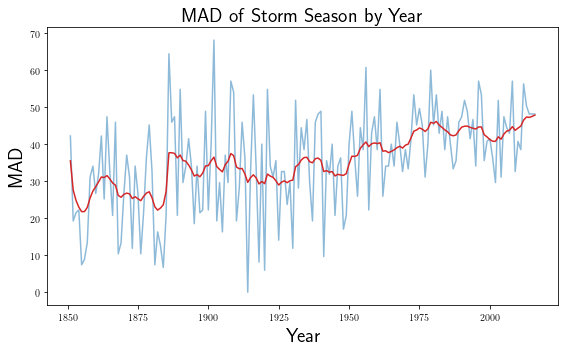

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()                                                                         
bp.curve(sdf['year'], sdf['mad'], alpha=0.5)                                                   
bp.curve(sdf['year'], posterior['y_pred'].mean(0), color='tab:red')                  
plt.ylabel('MAD', fontsize=20)                                                              
plt.xlabel('Year', fontsize=20)
plt.title('MAD of Storm Season by Year', fontsize=20)
plt.tight_layout()

The variable $\eta$ defines the long run slope of the variation of the MAD estimates.  The point estimate of this model is similar to the point estimate from simple linear regression.  Here, however, we have an accurate estimate of the variation of the long run slope.

The median of the posterior distrbution of the long run slope, $\eta$, from the semilocal linear trend model is $.08$.  Below, $80$% and $95$% credible intervals provide estimates of error of $\eta$.  The density below, with $2.5, 10, 50, 90$, and $97.5$ percentiles drawn as short, blue ticks, depicts the posterior distribution of $\eta$.

We find evidence of a slight postive slope in MAD estimates across time.  The semilocal linear trend model shows that there is more noise in the estimate of slope than does simple linear regression.  We are not convinced that the slope estimate is significant.

Linear regression slope estimate: 0.12904573892740365
[-0.51222229 -0.30367801  0.08436632  0.45724729  0.66826862]


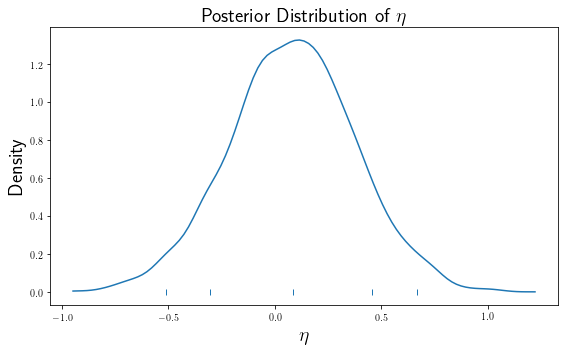

In [82]:
eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()  
bp.density(posterior['eta'])
bp.rug(eta_percentiles)
plt.ylabel('Density', fontsize=20)
plt.title('Posterior Distribution of $\eta$', fontsize=20)
plt.xlabel('$\eta$', fontsize=20)
plt.tight_layout()

In short, we have some evidence that the variation of the empirical storm season is not changing in time.  

Nonetheless, there are other ways to address the idea of Dr. Hassenzahl's question.  Next, we investigate whether or not the proportion of storms occuring outside of the official storm season is changing in time.

## Annual percentage of storms outside official storm season changing?

The official storm season is between June 01 and November 30.  In some years, all the storms form within the official storm season.  In other years, there are a few storms that form outside the official storm season.  Next, we consider the yearly percentage of storms that form outside of the official storm season.  This percentage is calculated for each year as follows.  Divide the number of storms that form outside the official storm season in a given year by the number of named storms that formed in that year and then multiple by 100.  If this yearly percentage were to trend up or down over time, we might believe that the empirical storm season were changing.

First, we calculate the percentage of storms forming outside of the official storm season for each year.

In [83]:
def outside_SS(df):
    y = df['year'].values[0]
    early = np.sum(df['date'] < datetime.datetime(y, 6, 1))
    late = np.sum(df['date'] > datetime.datetime(y, 10, 30))
    return 100 * (early + late) / df['year'].shape[0]

sdf['prop'] = df.groupby('year', as_index=False).apply(outside_SS)

Plotting these percentages over time shows that there were many years before 1975 where there were 0 storms outside of the storm season.  From about 1975 forward, there appears to always be some storms that formed outside of the official storm season.  In no years were all the storms outside of the official storm season.

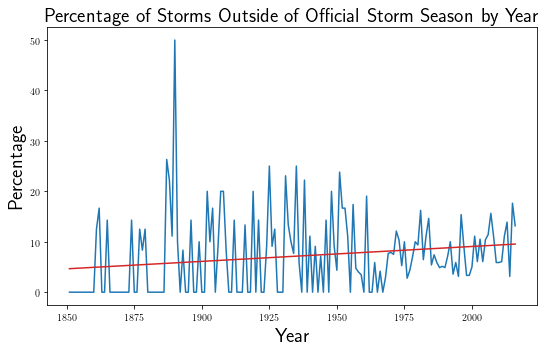

In [84]:
reg = sm.OLS(sdf['prop'], sm.tools.add_constant(sdf['year'])).fit()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()
bp.curve(sdf['year'], sdf['prop'])
bp.line(sdf['year'], reg.fittedvalues, color='tab:red')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.title('Percentage of Storms Outside of Official Storm Season by Year', fontsize=20)
plt.tight_layout()

We analyze these percentages using the same semilocal linear trend model as above.    If the slope parameter $\eta$ is significantly non-zero, we'll have found some evidence in a changing proportion of storms occuring outside of the official storm season.

In [85]:
sdata = {                                                                            
    'T': sdf.shape[0],                                                               
    'y': sdf['prop']
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .95}) 
posterior = stfit.extract() 

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [86]:
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters


The plot below displays the semilocal linear trend estimates of the percentages of storms that formed outside of the official storm season.  The model estimates are drawn in red and are superimposed over the light blue observations.  It appears to have a gentle positive slope.

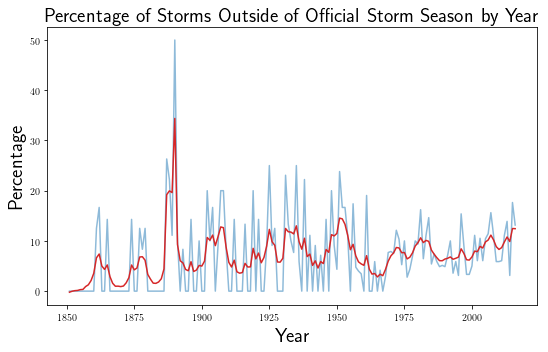

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()                                                                         
bp.curve(sdf['year'], sdf['prop'], alpha=0.5)                                                   
bp.curve(sdf['year'], posterior['y_pred'].mean(0), color='tab:red')                  
plt.ylabel('Percentage', fontsize=20)                                                              
plt.xlabel('Year', fontsize=20)
plt.title('Percentage of Storms Outside of Official Storm Season by Year', fontsize=20)
plt.tight_layout()

The posterior distribution of $\eta$ appears below, alongside multiple percentiles.  While the median of $\eta$ is positive, even the $80$\% credible interval includes 0.  While I certainly don't want to make a binary conclusion here, it appears that there is much noise in the estimate of the long term slope parameter $\eta$.

Linear regression slope estimate: 0.029563100102197704
[-0.44649044 -0.28261113  0.06130367  0.41552922  0.60747821]


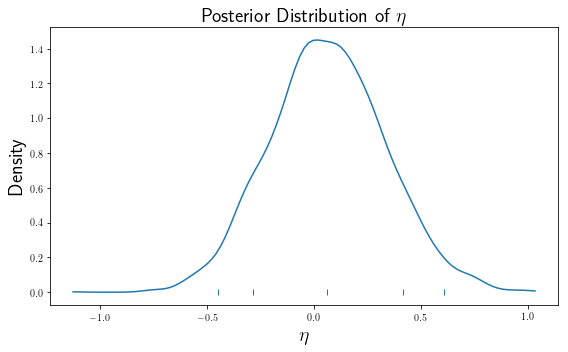

In [88]:
eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()  
bp.density(posterior['eta'])
bp.rug(eta_percentiles)
plt.ylabel('Density', fontsize=20)
plt.xlabel('$\eta$', fontsize=20)
plt.title('Posterior Distribution of $\eta$', fontsize=20)
plt.tight_layout()

It doesn't appear that the percentage of storms occuring outside of the official storm season is changing over time.

Last, we analyze the stationarity of the empirical storm season.

## Is the Distribution of the Empirical Storm Season Stationary?

Consider the average density [histogram](#average_density) above, where the empirical storm season was averaged over all the years for which we have data.  Let's refer to this histogram as the average storm season.  If the empirical storm season was not changing over time, then this average storm season would represent the stationary distribution from which each year's storm season was randomly drawn.  If such a stationary storm season producing distribution exists, then no year's storm season in our data set should be too different from the average storm season.

To evaluate the stationarity of the storm season, we compute such a histogram for each year's empirical storm season separately.  For instance, consider the [histogram of the storms from 2005](#2005_density).  Now imagine we overlayed the average storm season histogram with the histogram from the 2005 storm season.  We calculate the maximal, absolute difference between these two histograms.  This idea is most easily visualized with histograms, but in fact we do all the calculations with the empirical cumulative distribution functions of the empirical storm seasons.  Intuitively, these ideas are similar.  In fact, this is just the [Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) (KS) statistic, for each year's storm season relative to the average storm season.

We walk through each step of the calculations involved.  First, we calculate the average storm season.

In [89]:
hist, bins = np.histogram(df['cnum_dates'], 
                          bins=df['cnum_dates'].nunique(), density=True)
cdf = np.cumsum(hist)
ecdf = cdf/cdf[-1]

Next, we'll replicate this calculation for each year in our data set.

In [90]:
ks = []
for year in np.nditer(df['date'].dt.year.unique()):
    h, _ = np.histogram(df['cnum_dates'][df['date'].dt.year == year], 
                        bins=df['cnum_dates'].nunique(), density=True)
    bcdf = np.cumsum(h)
    ks.append(np.max(np.abs(ecdf - bcdf/bcdf[-1])))
sdf['KS'] = np.array(ks)*100

When we put the inappropriate linear regression line through these data, it appears to have a negative slope.  We remind the reader that the yearly KS statistics appear in absolute value.  Hence, a (possible) negative slope is not as indicative as the word negative connotes.  Here, any slope, positive or negative, will simply suggest a non-stationary storm season.

I stand by the inappropriateness of any linear regression solution.  I only present it here as a reminder, that which the eye wants to see is not necessarily statistically so, even if one produces a small p-value in an attempt to back up their claim.

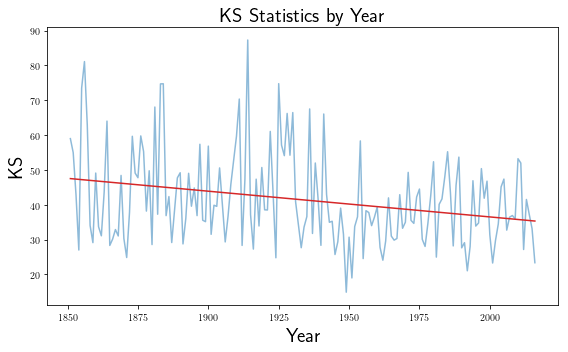

In [91]:
reg = sm.OLS(sdf['KS'], sm.tools.add_constant(sdf['year'])).fit()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()
bp.curve(sdf['year'], sdf['KS'], alpha=0.5)
bp.line(sdf['year'], reg.fittedvalues, color='tab:red')
plt.xlabel('Year', fontsize=20)
plt.ylabel('KS', fontsize=20)
plt.title('KS Statistics by Year', fontsize=20)
plt.tight_layout()

In [92]:
sdata = {                                                                            
    'T': sdf.shape[0],                                                               
    'y': sdf['KS']
}
stfit = stmod.sampling(data=sdata, 
                       control={'adapt_delta': .975,
                                'max_treedepth': 15}) 
posterior = stfit.extract()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [93]:
stan_utility.check_treedepth(stfit, max_depth=15)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

0 of 4000 iterations saturated the maximum tree depth of 15 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters


The semilocal linear trend model smoothes out the yearly KS statistics.  Similar to linear regression, there appears to be a negative slope.

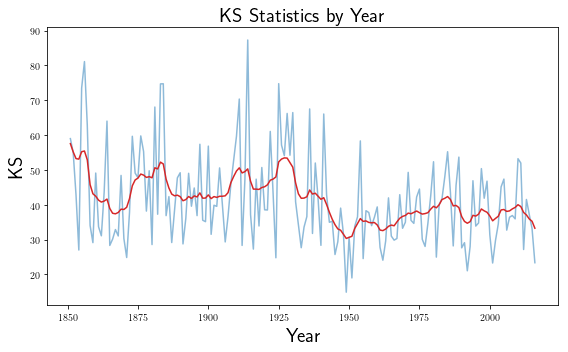

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()                                                                         
bp.curve(sdf['year'], sdf['KS'], alpha=0.5)                                                   
bp.curve(sdf['year'], posterior['y_pred'].mean(0), color='tab:red')  
plt.ylabel('KS', fontsize=20)                                                              
plt.xlabel('Year', fontsize=20)
plt.title('KS Statistics by Year', fontsize=20)
plt.tight_layout()

The posterior distribution of $\eta$ is noisy, despite the negative median value.

Linear regression slope estimate: -0.07381157679765982
[-0.66454647 -0.45826444 -0.07458582  0.31053416  0.51359907]


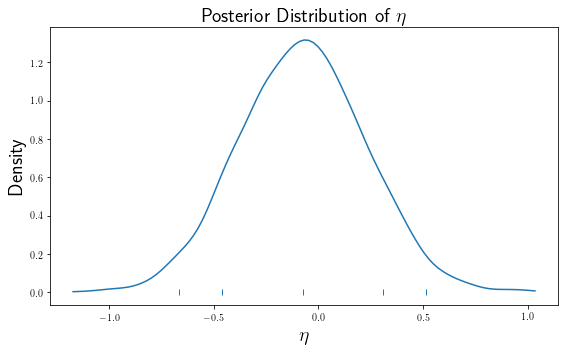

In [95]:
eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.cla()  
bp.density(posterior['eta'])
bp.rug(eta_percentiles)
plt.ylabel('Density', fontsize=20)
plt.title('Posterior Distribution of $\eta$', fontsize=20)
plt.xlabel('$\eta$', fontsize=20)
plt.tight_layout()

We find little evidence that the empirical storm season is non-stationary, since the posterior distribution of $\eta$ is so noisy about $0$.

# Conclusion

This blog post analyzed the variation of the empirical storm season in two different ways.  First, we considered the MAD estimates of the variation of the empirical storm season.  Second, we analyzed the percentage of storms that occured outside of the official storm season.  Neither of these analyses found evidence of significant changes in the variation of the empirical storm season.  

The last analysis considered the stationarity of the empirical storm season by investigating the slope of the yearly maximal discrepancy between the average storm season and each year's storm season.  Here, we calculated one KS statistic for each year in our data set.  Unlike the first two analyses, the KS statistic will identify any changes in distribution, not just the average or variance.  Yet, even with the yearly KS statistics, we still didn't find any significant changes in the empirical storm season.

A strong word of caution is in order.  None of the work here said anything about the [intensity of storms](https://www.ncdc.noaa.gov/news/tropical-cyclone-%E2%80%9Cmaximum-intensity%E2%80%9D-shifting-toward-poles), nor the length of storms [XXX cite me], nor the [speed of storms](https://www.ncei.noaa.gov/news/tropical-cyclone-slowdown), nor changes in anything that may influence storms [Karloski:2016].  In part, our focus on the variation of the empirical storm makes this analysis unique.  However, as we largely didn't discover any broad changes in the empirical storm season, we didn't find much of interest.  Which is to say, there may be a reason so many other people have focused their attention elsewhere; that's where all the interesting things are happening.

# Acknowledgments

This blog post would not have happened without the great minds of Dave Hassenzahl, Ann Bykerk-Kauffman, and the Department of Geological and Environmental Sciences.  Rachel Hensler provided excellent feedback.  And of course, the communities of Python, Stan, and NOAA's National Hurricane Center deserve much credit for their endless hard work.

# References

[Carpenter:2017] B. Carpenter, A. Gelman, M. D. Hoffman, D. Lee, B. Goodrich, M. Betancourt, M. Brubaker, J. Guo, P. Li, and A. Riddell. Stan: A probabilistic programming language. Journal of statistical software, 76(1), 2017. https://www.jstatsoft.org/article/view/v076i01

[Durbin:2012] J. Durbin and S. J. Koopman. Time Series Analysis by State Space Methods. Oxford University Press, 2 edition, 2012.

[Karloski:2016] J. M. Karloski and C. Evans. Seasonal influences upon and long-term trends in the length of the atlantic hurricane season. Journal of Climate, 29(1):273–292, 2016.  https://journals.ametsoc.org/doi/abs/10.1175/JCLI-D-15-0324.1

[Kim:2017] D. Kim, H.-S. Kim, D.-S. R. Park, and M.-S. Park. Variation of the tropical cyclone season start in the western north pacific. Journal of Climate, 30(9):3297–3302, 2017. https://journals.ametsoc.org/doi/full/10.1175/JCLI-D-16-0888.1

[Kossin:2008] J. P. Kossin. Is the north atlantic hurricane season getting longer? Geophysical Research Letters, 35(23), 2008. https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2008GL036012

[Landsea:2013] C. W. Landsea and J. L. Franklin. Atlantic hurricane database uncertainty and presentation of a new database format. Monthly Weather Review, 141(10):3576–3592, 2013. https://journals.ametsoc.org/doi/10.1175/MWR-D-12-00254.1

[R-Core-Team:2018] R Core Team. R: A Language and Environment for Statistical Computing. R Foundation for Statistical Computing, Vienna, Austria, 2018. https://www.R-project.org

[Stan-Development-Team:2016] Stan Development Team. rstanarm: Bayesian applied regression modeling via Stan., 2016. R package version 2.13.1.

[Scott:2018] S. L. Scott. bsts: Bayesian Structural Time Series, r package version 0.8.0 edition, 2018. https://CRAN.R-project.org/package=bsts

# Supplemental Analyses

This section contains analyses that are informative, but insignificantly different from the work above.  Hence, we present it here so that the uninterested reader may skip of this if they are uninterested.

## Autocorrelation

Throughout our analysis above, we claimed that there is a dependence of storms seasons over time.  Kim's efforts in 2017 also provide evidence of this.  The following calculations and plot display the autocorrelation of the time series we considered above: MAD estimates, percentages of storms formed outside of the official storm season, and KS statistics.

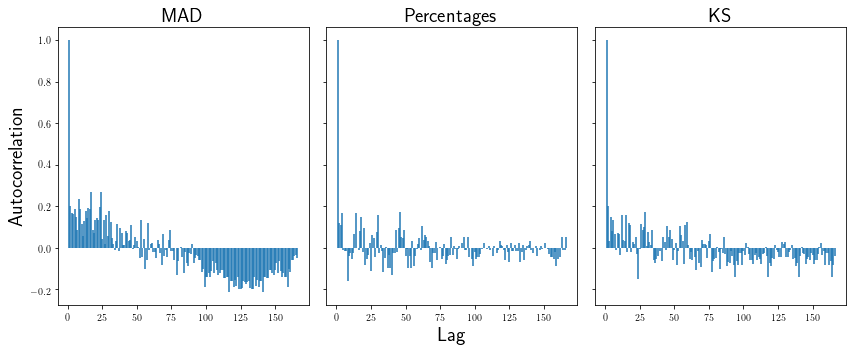

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
bp.autocorrelation(sdf['mad'], ax=ax[0])
ax[0].set_title('MAD', fontsize=20)
ax[0].set_ylabel('Autocorrelation', fontsize=20)
bp.autocorrelation(sdf['prop'], ax=ax[1])
ax[1].set_title('Percentages', fontsize=20)
ax[1].set_xlabel('Lag', fontsize=20)
bp.autocorrelation(sdf['KS'], ax=ax[2])
ax[2].set_title('KS', fontsize=20)
plt.tight_layout()

While all year over year measures of variation display light to moderate signs of autocorrelation, MAD and KS (left and right, respectively) display at first some positive autocorrelation and then some negative autocorrelation.  The percentages of storms forming outside of the official storm season appears to have only a small amount of autocorrelation.

Evidence of autocorrelation in any time series should encourage researchers to adopt more sophisticated models than simple linear regression.  Here, we adopted the semilocal linear trend model.

## Priors

The semilocal linear trend model above is fit with a Bayesian model, hence there are priors are on all parameters.  An effort has been made to be weakly informative by following a combination of the [guidelines established by the Stan community](https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations) and the default [priors for rstanarm](https://cran.r-project.org/web/packages/rstanarm/vignettes/priors.html) [Stan-Development-Team:2016].

Specifically, the parameters $\sigma_y, \eta$, and $\phi$ have priors.

$$
\begin{align}
\sigma_y & \sim \text{Exponential}(1 / \text{standard_deviation}(\mathbf{y}) ) \\
\eta & \sim \mathbb{t}_3(0, 1) \\
\phi & \sim \mathbb{N}(0, 0.5) \\
\end{align}
$$

The prior on $\sigma_y$ attempts to match the scale of the standard deviation of the original observations $y_1, \ldots, y_T$ by scaling an $\text{Exponential(1)}$ distribution appropriately.  The prior on $\eta$ is treated as a regression coefficient in a multiple regression model and thus has a t-distribution on it with degrees of freedom that allow for as wide a distribution as possible with a finite variance.  The prior on $\phi$ attempts to weakly inform $\phi$ towards 0 with a standard deviation of 0.5.  This leaves room for the data to insist upon a posterior distribution on $\phi$ to be near the extremes $-1$ or $1$.  


## Atlantic Ocean

Below we subset the original data set to just use the data from the Atlantic Ocean.  This is inline with Kossin's research where just the Atlantic Ocean was considered.

In [97]:
adf = df.loc[df['name'].str.contains('^AL')]
sdf = (adf[['year', 'mad']].groupby('year', as_index=False)
            .aggregate(lambda x: 1.4826*np.median(x)))
sdf['prop'] = adf.groupby('year', as_index=False).apply(outside_SS)
hist, bins = np.histogram(adf['cnum_dates'], 
                          bins=adf['cnum_dates'].nunique(), density=True)
cdf = np.cumsum(hist)
ecdf = cdf/cdf[-1]
ks = []
for year in np.nditer(adf['date'].dt.year.unique()):
    h, _ = np.histogram(adf['cnum_dates'][adf['date'].dt.year == year], 
                        bins=adf['cnum_dates'].nunique(), density=True)
    bcdf = np.cumsum(h)
    ks.append(np.max(np.abs(ecdf - bcdf/bcdf[-1])))
sdf['KS'] = np.array(ks)*100

We further create three separate data sets, for just the Atlantic Ocean, based on the time spans 1851 to 2016, 1950 to 2016, and 1980 to 2016.  Kossin argued that splitting up the data into these three distinct subsets would help avoid any potential measurement errors introduced by advancement in the technology used to detect storms [Kossin:2008].

<strong>1950 to 2016</strong>

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: -0.002189169127623243
[-0.91581007 -0.60364461 -0.04016039  0.51490129  0.81741138]


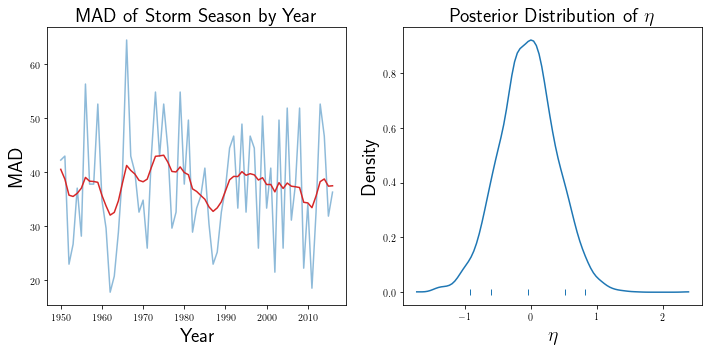

In [98]:
# MAD estimates
y1950_idx = sdf['year'] >= 1950
sdata = {                                                                            
    'T': np.sum(y1950_idx),                                                               
    'y': sdf.loc[y1950_idx]['mad'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1950_idx]['year'], sdf.loc[y1950_idx]['mad'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1950_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('MAD', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('MAD of Storm Season by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1950_idx]['mad'], 
             sm.tools.add_constant(sdf.loc[y1950_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: -0.0038128475204844752
[-0.80952439 -0.50292472  0.01504766  0.55181245  0.8380755 ]


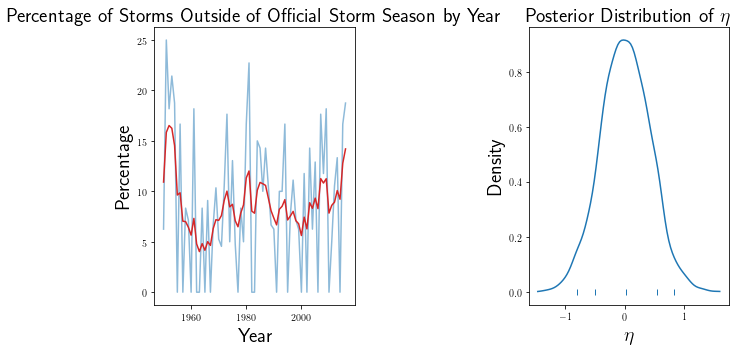

In [99]:
## Percentage of storms forming outside of the official storm season
sdata = {                                                                            
    'T': np.sum(y1950_idx),                                                               
    'y': sdf.loc[y1950_idx]['prop'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1950_idx]['year'], sdf.loc[y1950_idx]['prop'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1950_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('Percentage', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('Percentage of Storms Outside of Official Storm Season by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1950_idx]['prop'], 
             sm.tools.add_constant(sdf.loc[y1950_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: 0.022767722135254336
[-9.18990900e-01 -5.84158653e-01 -6.50337972e-04  5.63713278e-01
  8.78355036e-01]


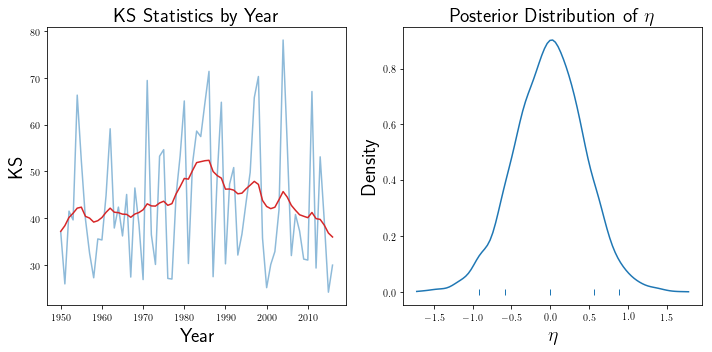

In [100]:
# KS statistics
sdata = {                                                                            
    'T': np.sum(y1950_idx),                                                               
    'y': sdf.loc[y1950_idx]['KS'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1950_idx]['year'], sdf.loc[y1950_idx]['KS'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1950_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('KS', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('KS Statistics by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1950_idx]['KS'], 
             sm.tools.add_constant(sdf.loc[y1950_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

<strong>1980 to 2016</strong>

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
2.0 of 4000 iterations ended with a divergence (0.05%)
  Try running with larger adapt_delta to remove the divergences
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: 0.02829523470839406
[-1.15687101 -0.75271111 -0.05827681  0.66185395  1.02569783]


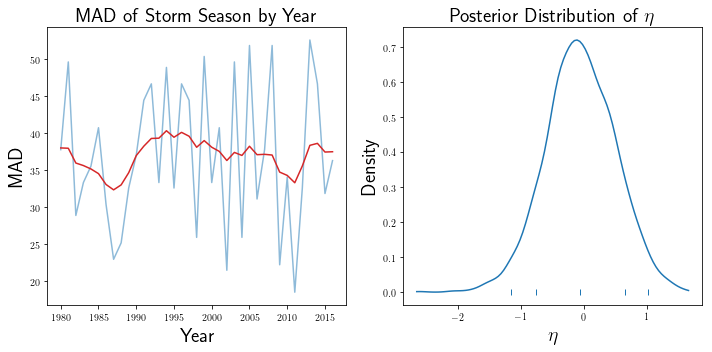

In [101]:
# MAD estimates
y1980_idx = sdf['year'] >= 1980
sdata = {                                                                            
    'T': np.sum(y1980_idx),                                                               
    'y': sdf.loc[y1980_idx]['mad'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1980_idx]['year'], sdf.loc[y1980_idx]['mad'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1980_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('MAD', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('MAD of Storm Season by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1980_idx]['mad'], 
             sm.tools.add_constant(sdf.loc[y1980_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
1.0 of 4000 iterations ended with a divergence (0.025%)
  Try running with larger adapt_delta to remove the divergences
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: -0.0064435082825577885
[-1.04653961 -0.64570147  0.02048617  0.7133591   1.09645211]


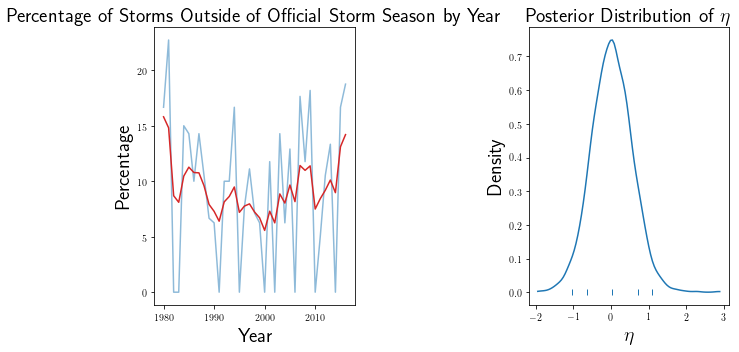

In [102]:
## Percentage of storms forming outside of the official storm season
sdata = {                                                                            
    'T': np.sum(y1980_idx),                                                               
    'y': sdf.loc[y1980_idx]['prop'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1980_idx]['year'], sdf.loc[y1980_idx]['prop'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1980_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('Percentage', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('Percentage of Storms Outside of Official Storm Season by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1980_idx]['prop'], 
             sm.tools.add_constant(sdf.loc[y1980_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
1.0 of 4000 iterations ended with a divergence (0.025%)
  Try running with larger adapt_delta to remove the divergences
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: -0.4750835232364931
[-1.75443065 -1.26602283 -0.44079506  0.31522406  0.79867861]


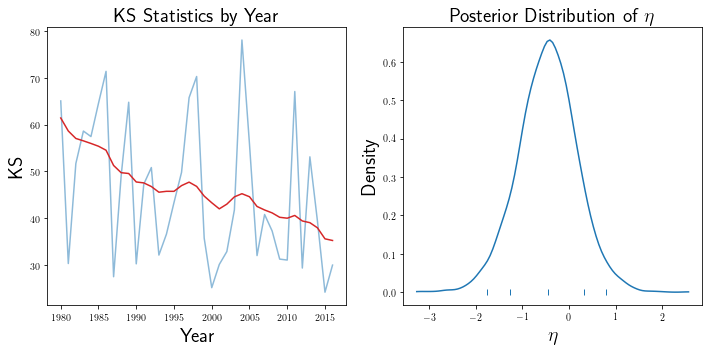

In [103]:
## KS Statistics
sdata = {                                                                            
    'T': np.sum(y1980_idx),                                                               
    'y': sdf.loc[y1980_idx]['KS'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1980_idx]['year'], sdf.loc[y1980_idx]['KS'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1980_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('KS', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('KS Statistics by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1980_idx]['KS'], 
             sm.tools.add_constant(sdf.loc[y1980_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

The above analysis is about the only data set that provides a slope estimate that could indicate a change in the storm season's distribution that might be meaningful.  Though, the fact that it shows up in the midst of my slice and dice the data set makes me hesitant to admit that this result is anything but a creation of my somewhat arbitrary division of the data set.  Certainly, more theory is needed beyond the claim that technology changed right around 1980.

## Pacific Ocean

Below we subset the original data set to just use the data from the Pacific Ocean.

In [104]:
pdf = df.loc[~df['name'].str.contains('^AL')]
sdf = (pdf[['year', 'mad']].groupby('year', as_index=False)
            .aggregate(lambda x: 1.4826*np.median(x)))
sdf['prop'] = pdf.groupby('year', as_index=False).apply(outside_SS)
hist, bins = np.histogram(pdf['cnum_dates'], 
                          bins=pdf['cnum_dates'].nunique(), density=True)
cdf = np.cumsum(hist)
ecdf = cdf/cdf[-1]
ks = []
for year in np.nditer(pdf['date'].dt.year.unique()):
    h, _ = np.histogram(pdf['cnum_dates'][pdf['date'].dt.year == year], 
                        bins=pdf['cnum_dates'].nunique(), density=True)
    bcdf = np.cumsum(h)
    ks.append(np.max(np.abs(ecdf - bcdf/bcdf[-1])))
sdf['KS'] = np.array(ks)*100

<strong>1950 to 2016</strong>

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: 0.04665296911165965
[-0.81997834 -0.51793261  0.05032661  0.61616554  0.92462694]


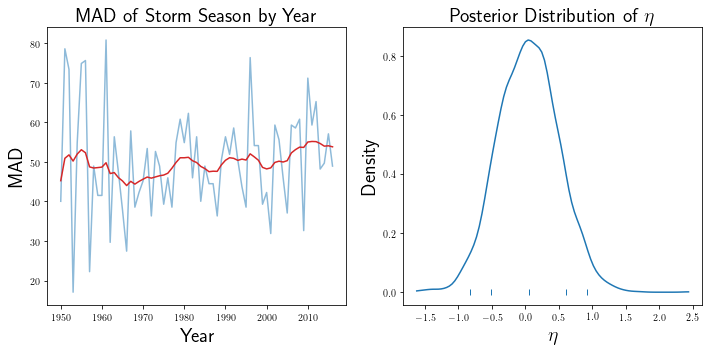

In [105]:
## MAD estimates
y1950_idx = sdf['year'] >= 1950
sdata = {                                                                            
    'T': np.sum(y1950_idx),                                                               
    'y': sdf.loc[y1950_idx]['mad'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1950_idx]['year'], sdf.loc[y1950_idx]['mad'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1950_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('MAD', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('MAD of Storm Season by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1950_idx]['mad'], 
             sm.tools.add_constant(sdf.loc[y1950_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: 0.08294092131569782
[-0.7740413  -0.49924121  0.03178493  0.54866095  0.8576858 ]


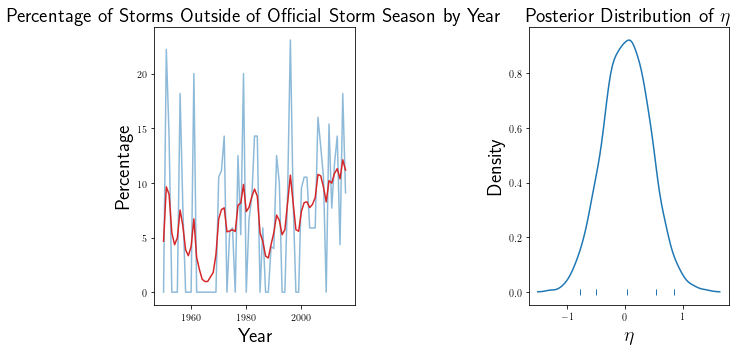

In [106]:
## Percentage of storms forming outside of the official storm season
sdata = {                                                                            
    'T': np.sum(y1950_idx),                                                               
    'y': sdf.loc[y1950_idx]['prop'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1950_idx]['year'], sdf.loc[y1950_idx]['prop'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1950_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('Percentage', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('Percentage of Storms Outside of Official Storm Season by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1950_idx]['prop'], 
             sm.tools.add_constant(sdf.loc[y1950_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: -0.13895031119436016
[-0.89922544 -0.59519675 -0.05021839  0.50170221  0.82583559]


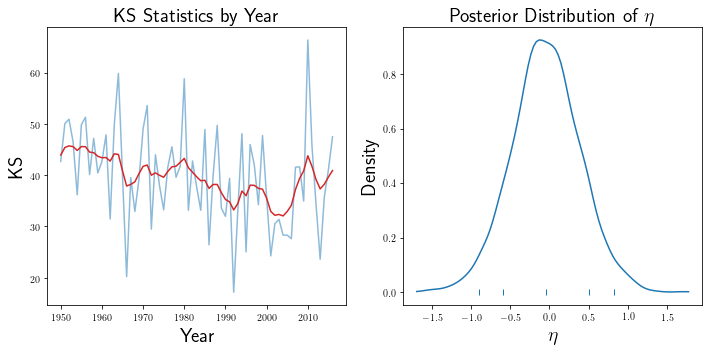

In [107]:
## KS statistics
sdata = {                                                                            
    'T': np.sum(y1950_idx),                                                               
    'y': sdf.loc[y1950_idx]['KS'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1950_idx]['year'], sdf.loc[y1950_idx]['KS'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1950_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('KS', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('KS Statistics by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1950_idx]['KS'], 
             sm.tools.add_constant(sdf.loc[y1950_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

<strong>1980 to 2016</strong>

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: 0.13444630156473084
[-1.1900793  -0.77064953 -0.04611182  0.68795926  1.09419571]


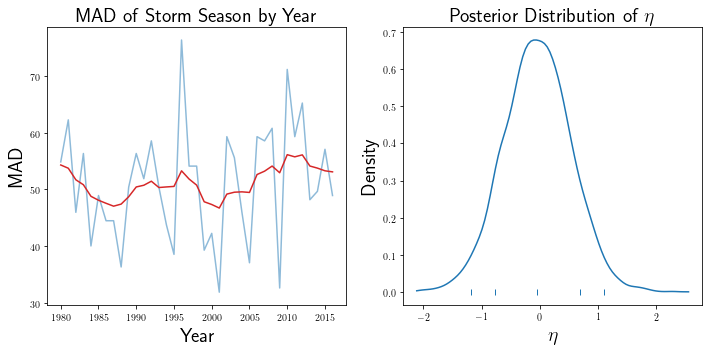

In [108]:
## MAD estimates
y1980_idx = sdf['year'] >= 1980
sdata = {                                                                            
    'T': np.sum(y1980_idx),                                                               
    'y': sdf.loc[y1980_idx]['mad'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1980_idx]['year'], sdf.loc[y1980_idx]['mad'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1980_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('MAD', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('MAD of Storm Season by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1980_idx]['mad'], 
             sm.tools.add_constant(sdf.loc[y1980_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
1.0 of 4000 iterations ended with a divergence (0.025%)
  Try running with larger adapt_delta to remove the divergences
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: 0.1710951131642432
[-0.97792106 -0.56119784  0.13264293  0.84328334  1.2836577 ]


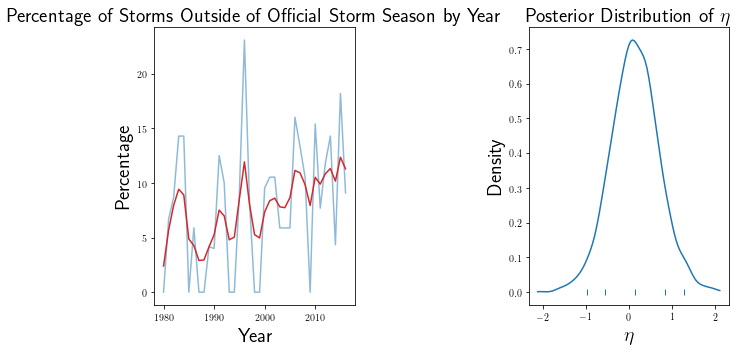

In [109]:
## Percentage of storms forming outside of the official storm season
sdata = {                                                                            
    'T': np.sum(y1980_idx),                                                               
    'y': sdf.loc[y1980_idx]['prop'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1980_idx]['year'], sdf.loc[y1980_idx]['prop'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1980_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('Percentage', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('Percentage of Storms Outside of Official Storm Season by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1980_idx]['prop'], 
             sm.tools.add_constant(sdf.loc[y1980_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

/Users/ez/py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 4000 iterations ended with a divergence (0.0%)
Rhat looks reasonable for all parameters
n_eff / iter looks reasonable for all parameters
Linear regression slope estimate: -0.03410774978429372
[-1.2745014  -0.83992626 -0.05216058  0.70511542  1.1322377 ]


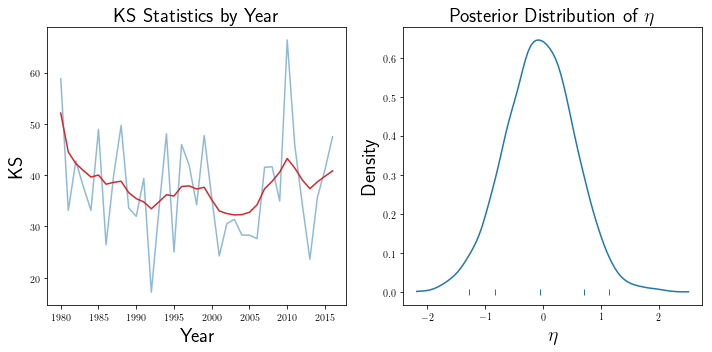

In [110]:
## KS statistics
sdata = {                                                                            
    'T': np.sum(y1980_idx),                                                               
    'y': sdf.loc[y1980_idx]['KS'].values.ravel()
}
stfit = stmod.sampling(data=sdata,
                      control={'adapt_delta': .975})                                                                                                                                    
posterior = stfit.extract()  
stan_utility.check_treedepth(stfit)
stan_utility.check_energy(stfit)
stan_utility.check_div(stfit)
stan_utility.check_rhat(stfit)
stan_utility.check_n_eff(stfit)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))                                                                     
bp.curve(sdf.loc[y1980_idx]['year'], sdf.loc[y1980_idx]['KS'], alpha=0.5, ax=ax[0])                                                   
bp.curve(sdf.loc[y1980_idx]['year'], posterior['y_pred'].mean(0), color='tab:red', ax=ax[0])                  
ax[0].set_ylabel('KS', fontsize=20)                                                              
ax[0].set_xlabel('Year', fontsize=20)
ax[0].set_title('KS Statistics by Year', fontsize=20)

eta_percentiles = np.percentile(posterior['eta'], [2.5, 10, 50, 90, 97.5])
reg = sm.OLS(sdf.loc[y1980_idx]['KS'], 
             sm.tools.add_constant(sdf.loc[y1980_idx]['year'])).fit()
print("Linear regression slope estimate: {}".format(reg.params[1]))
print(eta_percentiles)
  
bp.density(posterior['eta'], ax=ax[1])
bp.rug(eta_percentiles, ax=ax[1])
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_title('Posterior Distribution of $\eta$', fontsize=20)
ax[1].set_xlabel('$\eta$', fontsize=20)
plt.tight_layout()

# Licenses

Code: Copyright (2018) California State University, Chico. Released under the BSD 3-clause license.

Text: Copyright (2018) Edward A. Roualdes. Released under the the CC BY-NC 4.0 license.